In [194]:
import pandas as pd
import numpy as np

import cv2
import os

from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization

import matplotlib.pyplot as plt

In [128]:
import tensorflow as tf

In [129]:
train_image_path="D:\\Hackeathon\\Kaggle\\Alzheimer'sDataset\\Alzheimer_s Dataset\\train\\"
test_image_path= "D:\\Hackeathon\\Kaggle\\Alzheimer'sDataset\\Alzheimer_s Dataset\\test\\"

In [130]:
def getImageList(path):
    images = []
    for filename in os.listdir(path):
        img=cv2.imread(os.path.join(path,filename),0)
        images.append(img)
    return images

def getDataFrame(path, classname):
    filenames = os.listdir(path)
    df = pd.DataFrame(filenames)
    df = df.rename(columns={0:'filename'})
    df['label'] = classname
    return df

In [131]:
type(getImageList(MildDemented_path))

list

In [132]:
getDataFrame(ModDemented_path, 2).head()

,filename,label
0,27 (2).jpg,2
1,27.jpg,2
2,28 (2).jpg,2
3,28.jpg,2
4,29 (2).jpg,2


In [238]:
train_img = []
MildDemented_path = train_image_path + 'MildDemented'
train_img.extend(getImageList(MildDemented_path))
print('Mild Demented images:', len(train_img))

df = getDataFrame(MildDemented_path, 0)
print('Mild Demented DF:', df.shape)

ModDemented_path = train_image_path + 'ModerateDemented'
train_img.extend(getImageList(ModDemented_path))
print('Moderate Demented images:', len(train_img))

df = df.append(getDataFrame(ModDemented_path, 1))
print('Moderate Demented DF:', df.shape)

NonDemented_path = train_image_path + 'NonDemented'
train_img.extend(getImageList(NonDemented_path))
print('Non Demented images:', len(train_img))

df = df.append(getDataFrame(NonDemented_path, 2))
print('Non Demented DF:', df.shape)

VeryMildDemented_path = train_image_path + 'VeryMildDemented'
train_img.extend(getImageList(VeryMildDemented_path))
print('Very Mild Demented images:', len(train_img))

df = df.append(getDataFrame(VeryMildDemented_path, 3))
print('Very Mild Demented DF:', df.shape)

train_img_list = train_img

Mild Demented images: 717
Mild Demented DF: (717, 2)
Moderate Demented images: 769
Moderate Demented DF: (769, 2)
Non Demented images: 3329
Non Demented DF: (3329, 2)
Very Mild Demented images: 5121
Very Mild Demented DF: (5121, 2)


In [239]:
test_img = []
MildDemented_path = test_image_path + 'MildDemented'
test_img.extend(getImageList(MildDemented_path))
print('Mild Demented images:', len(test_img))

test_df = getDataFrame(MildDemented_path, 0)
print('Mild Demented DF:', test_df.shape)

ModDemented_path = test_image_path + 'ModerateDemented'
test_img.extend(getImageList(ModDemented_path))
print('Moderate Demented images:', len(test_img))

test_df = test_df.append(getDataFrame(ModDemented_path, 1))
print('Moderate Demented DF:', test_df.shape)

NonDemented_path = test_image_path + 'NonDemented'
test_img.extend(getImageList(NonDemented_path))
print('Non Demented images:', len(test_img))

test_df = test_df.append(getDataFrame(NonDemented_path, 2))
print('Non Demented DF:', test_df.shape)

VeryMildDemented_path = test_image_path + 'VeryMildDemented'
test_img.extend(getImageList(VeryMildDemented_path))
print('Very Mild Demented images:', len(test_img))

test_df = test_df.append(getDataFrame(VeryMildDemented_path, 3))
print('Very Mild Demented DF:', test_df.shape)

test_img_list = test_img

Mild Demented images: 179
Mild Demented DF: (179, 2)
Moderate Demented images: 191
Moderate Demented DF: (191, 2)
Non Demented images: 831
Non Demented DF: (831, 2)
Very Mild Demented images: 1279
Very Mild Demented DF: (1279, 2)


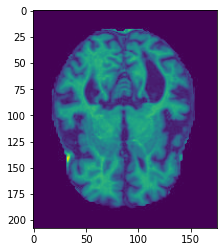

In [240]:
plt.imshow(train_img[0])
plt.show()

In [241]:
train_img.extend(test_img)
df = df.append(test_df)

In [249]:
train_img_data = np.array(train_img)

In [242]:
len(train_img)

6400

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [243]:
train_label = df['label']

In [256]:
len(train_img_data), len(train_label)

(6400, 6400)

In [261]:
# use only 33% of training data to expedite the training process
train, test , y_train, y_test = train_test_split(train_img_data, train_label, test_size = 0.2, random_state = 7)

In [262]:
print(train.shape, test.shape, y_train.shape, y_test.shape)

(5120, 208, 176) (1280, 208, 176) (5120,) (1280,)


In [263]:
X_train_reshaped = train.reshape((train.shape[0], -1))
X_test_reshaped = test.reshape((test.shape[0], -1))

In [264]:
X_train_reshaped.shape, X_test_reshaped.shape, y_train.shape, y_test.shape

((5120, 36608), (1280, 36608), (5120,), (1280,))

In [267]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [191]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [268]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (36608, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('relu'))  
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('relu'))    
    model.add(Dense(4))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.0001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [269]:
model = mlp_model()
history = model.fit(X_train_reshaped, y_train, validation_split = 0.2, epochs = 100, verbose = 1)

Train on 4096 samples, validate on 1024 samples
Epoch 1/100
4096/4096 [==============================] - 7s 2ms/step - loss: 1.0704 - accuracy: 0.5608 - val_loss: 3.6528 - val_accuracy: 0.5107
Epoch 2/100
4096/4096 [==============================] - 5s 1ms/step - loss: 0.7217 - accuracy: 0.7686 - val_loss: 0.9187 - val_accuracy: 0.6162
Epoch 3/100
4096/4096 [==============================] - 5s 1ms/step - loss: 0.5041 - accuracy: 0.8767 - val_loss: 0.8438 - val_accuracy: 0.6484
Epoch 4/100
4096/4096 [==============================] - 2s 574us/step - loss: 0.3564 - accuracy: 0.9309 - val_loss: 1.4965 - val_accuracy: 0.4580
Epoch 5/100
4096/4096 [==============================] - 2s 420us/step - loss: 0.2508 - accuracy: 0.9595 - val_loss: 0.9214 - val_accuracy: 0.6338
Epoch 6/100
4096/4096 [==============================] - 2s 419us/step - loss: 0.1763 - accuracy: 0.9788 - val_loss: 0.5349 - val_accuracy: 0.8057
Epoch 7/100
4096/4096 [==============================] - 2s 417us/step - los

4096/4096 [==============================] - 2s 416us/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 4.7763 - val_accuracy: 0.3184
Epoch 57/100
4096/4096 [==============================] - 2s 425us/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.6239 - val_accuracy: 0.8184
Epoch 58/100
4096/4096 [==============================] - 2s 417us/step - loss: 0.0390 - accuracy: 0.9885 - val_loss: 0.8755 - val_accuracy: 0.7559
Epoch 59/100
4096/4096 [==============================] - 2s 416us/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.2243 - val_accuracy: 0.9277
Epoch 60/100
4096/4096 [==============================] - 2s 425us/step - loss: 0.0110 - accuracy: 0.9971 - val_loss: 0.3057 - val_accuracy: 0.9189
Epoch 61/100
4096/4096 [==============================] - 2s 416us/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.4359 - val_accuracy: 0.8906
Epoch 62/100
4096/4096 [==============================] - 2s 417us/step - loss: 0.0166 - accuracy: 0.9951 - val_loss: 0.6099 

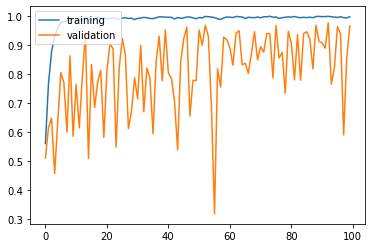

In [270]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [271]:
results = model.evaluate(X_test_reshaped, y_test)

1280/1280 [==============================] - 0s 225us/step


In [272]:
results

[0.14437374096596614, 0.960156261920929]